## Домашнаяя работа №2
### Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация в Matplotlib.

### 1. Импорт библиотек и настройка

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Создаем папку для графиков, если её нет (на всякий случай)
os.makedirs('figures', exist_ok=True)

print("Библиотеки импортированы, папка figures проверена.")

Библиотеки импортированы, папка figures проверена.


### 2. Загрузка данных и первичный осмотр

In [4]:
# Загрузка датасета
try:
    df = pd.read_csv('S02-hw-dataset.csv')
    print("Датасет успешно загружен.")
except FileNotFoundError:
    print("Ошибка: Файл 'S02-hw-dataset.csv' не найден. Убедитесь, что он лежит в той же папке.")

# Вывод первых строк
display(df.head())

# Информация о типах данных
print("\n--- Info ---")
df.info()

# Описательные статистики
print("\n--- Describe ---")
display(df.describe())

Датасет успешно загружен.


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

--- Describe ---


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### 3. Контроль качества данных (Пропуски и Дубликаты)

In [5]:
print("--- Анализ пропусков ---")
# Доля пропусков
print(df.isna().mean())

print("\n--- Анализ дубликатов ---")
# Количество полных дубликатов
dup_count = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {dup_count}")

# Показываем дубликаты
display(df[df.duplicated(keep=False)])

print("\n--- Поиск подозрительных значений ---")
# 1. Отрицательные покупки
suspicious_purchases = df[df['purchases'] < 0]
print(f"Отрицательные покупки ({len(suspicious_purchases)}):")
display(suspicious_purchases)

# 2. Слишком большой возраст (например, > 100) или слишком маленький (например, < 10 для покупателя)
suspicious_age = df[(df['age'] > 100) | (df['age'] < 14)]
print(f"Подозрительный возраст ({len(suspicious_age)}):")
display(suspicious_age)

# 3. Нулевая выручка при наличии покупок (бесплатно отдали?)
zero_revenue_buy = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
print(f"Есть покупки, но выручка 0 ({len(zero_revenue_buy)}):")
display(zero_revenue_buy)

--- Анализ пропусков ---
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

--- Анализ дубликатов ---
Количество полных дубликатов строк: 1


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511



--- Поиск подозрительных значений ---
Отрицательные покупки (1):


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Подозрительный возраст (2):


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


Есть покупки, но выручка 0 (1):


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


#### Наблюдения по качеству:
1. В данных есть 1 полный дубликат (User ID 10).
2. В столбце age есть пропуски (NaN).
3. Обнаружены аномалии:
    * Пользователь ID 6: Возраст 120 лет (ошибка ввода?), количество покупок -1 (логическая ошибка).
    * Пользователь ID 21: Возраст 5 лет (слишком мал для самостоятельных покупок).
    * Пользователь ID 11: Сделал 4 покупки, но выручка 0 (возможна ошибка или подарок).

### 4. Базовый EDA (Группировки)

In [6]:
# Частоты по странам
print("--- Распределение клиентов по странам ---")
print(df['country'].value_counts())

# Группировка: Средняя выручка и средний возраст по странам
country_stats = df.groupby('country').agg({
    'revenue': ['count', 'mean', 'sum'],
    'age': 'mean',
    'purchases': 'mean'
}).round(1)

print("\n--- Статистика по странам ---")
display(country_stats)

--- Распределение клиентов по странам ---
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

--- Статистика по странам ---


revenue                  age purchases
          count    mean    sum  mean      mean
country                                       
CN            2  1054.0   2108  24.0       4.5
DE            6  1445.5   8673  34.6       6.5
FR           12   675.9   8111  46.2       4.2
RU           13   790.1  10271  30.1       4.8
US            8   557.4   4459  36.7       4.6

#### Наблюдения EDA:
* Больше всего клиентов из России (RU) и Франции (FR).
* Германия (DE) показывает высокую среднюю выручку, несмотря на меньшее количество клиентов.
* Китай (CN) представлен всего двумя клиентами.

### 5. Визуализация (Matplotlib)

/tmp/ipython-input-2638986418.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=countries)


График сохранен в файл: figures/eda_plots.png


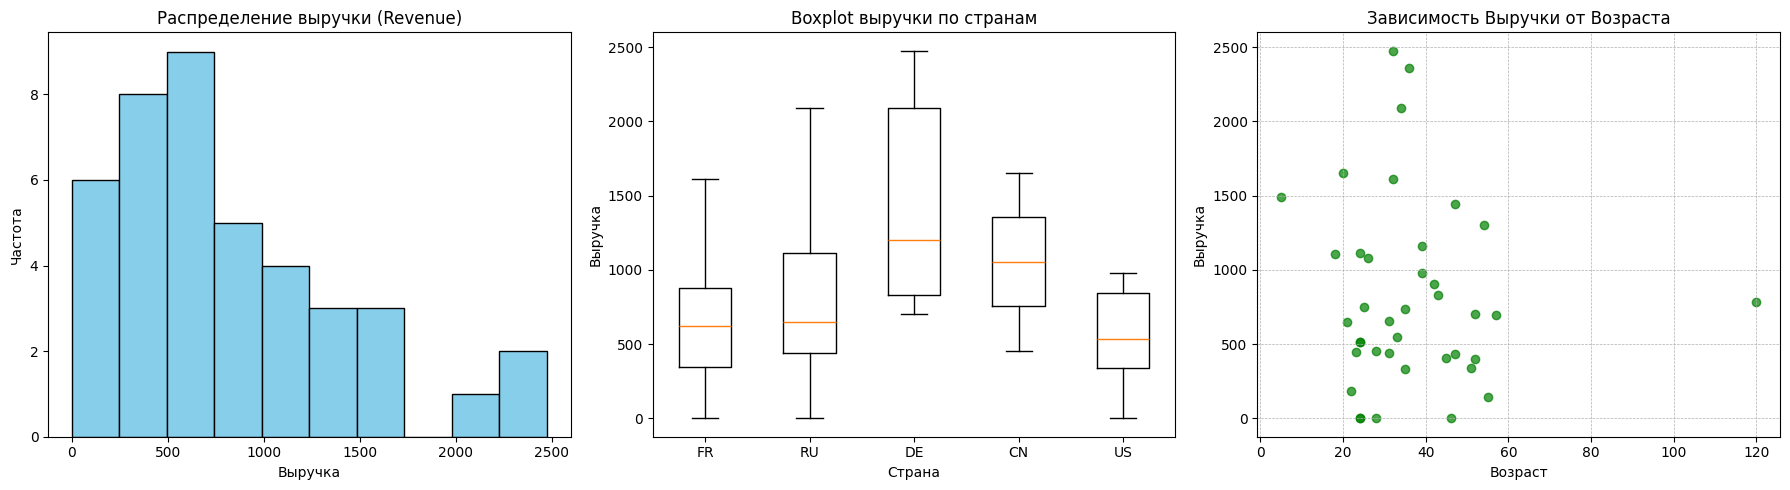

In [7]:
# Настройка размера графиков
plt.figure(figsize=(18, 5))

# 1. Гистограмма распределения выручки (Revenue)
plt.subplot(1, 3, 1)
plt.hist(df['revenue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение выручки (Revenue)')
plt.xlabel('Выручка')
plt.ylabel('Частота')

# 2. Боксплот: Выручка по странам
# Для боксплота нужно подготовить данные списком по группам или использовать pandas plot
plt.subplot(1, 3, 2)
countries = df['country'].unique()
data_to_plot = [df[df['country'] == c]['revenue'] for c in countries]
plt.boxplot(data_to_plot, labels=countries)
plt.title('Boxplot выручки по странам')
plt.xlabel('Страна')
plt.ylabel('Выручка')

# 3. Scatter plot: Возраст vs Выручка
plt.subplot(1, 3, 3)
plt.scatter(df['age'], df['revenue'], alpha=0.7, c='green')
plt.title('Зависимость Выручки от Возраста')
plt.xlabel('Возраст')
plt.ylabel('Выручка')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Корректировка макета
plt.tight_layout()

# СОХРАНЕНИЕ ГРАФИКА
save_path = 'figures/eda_plots.png'
plt.savefig(save_path)
print(f"График сохранен в файл: {save_path}")

plt.show()

### Комментарии к графикам

#### 1. Гистограмма распределения выручки (Revenue)
*   **Что показано:** Частота встречаемости разных диапазонов выручки. Ось X — сумма выручки, Ось Y — количество клиентов.
*   **Выводы:** Распределение не является «колоколом» (нормальным). Мы видим, что основная масса платежей находится в диапазоне от 0 до 1500 у.е., но есть отдельная группа высокодоходных клиентов (справа), которые тратят более 2000 у.е.

#### 2. Boxplot (Ящик с усами) выручки по странам
*   **Что показано:** Медиана (зеленая или оранжевая линия внутри ящика), квартили (границы ящика) и разброс выручки для каждой страны отдельно.
*   **Выводы:**
    *   **DE (Германия):** Самый «дорогой» сегмент. Медианная выручка значительно выше, чем в других странах.
    *   **RU (Россия) и FR (Франция):** Имеют широкий разброс значений — от 0 до высоких сумм.
    *   **CN (Китай):** Данных слишком мало (узкий ящик или просто линия), чтобы делать надежные выводы.

#### 3. Диаграмма рассеяния (Scatter Plot): Возраст vs Выручка
*   **Что показано:** Каждая точка — это конкретный клиент. По горизонтали — его возраст, по вертикали — сколько денег он принес.
*   **Выводы:**
    *   **Отсутствие корреляции:** Облако точек хаотично, четкой линии (тренда) нет. Это значит, что возраст клиента напрямую не влияет на то, сколько он тратит (молодые тратят и мало, и много; пожилые — аналогично).
    *   **Выбросы:** График отлично подсвечивает ошибки данных, найденные ранее: точку справа (возраст ~120 лет) и точку слева (ребенок ~5 лет).